In [1]:
import torch
import os
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import v2
from torch import nn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# variables for controlling the model 
hyperparameter = {
    'image_size':224, 
    'batch_size':16,
    'lr':0.01,
    'epoch':30
}

In [3]:
transforms = v2.Compose([
    v2.RandomResizedCrop(size=(hyperparameter['image_size'], hyperparameter['image_size']), antialias=True),
    v2.RandomHorizontalFlip(p=0.2),
    v2.ToTensor(),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [4]:
# Data loading from folder, where target and resizing is done
train_dataset = ImageFolder(root = os.path.join('data', 'train'), transform=transforms)
test_dataset = ImageFolder(root = os.path.join('data', 'test'), transform = transforms)

In [5]:
# This is the code for batching the data for mini-batch gradient descent
train_dataloader = DataLoader(train_dataset, batch_size = hyperparameter['batch_size'], shuffle= True,drop_last = True)
test_dataloader = DataLoader(test_dataset, batch_size = hyperparameter['batch_size'], shuffle = True, drop_last = True)

In [6]:
for image, label in train_dataloader:
    print(label)
    print(image.shape)
    print(label.shape)
    break

tensor([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1])
torch.Size([16, 3, 224, 224])
torch.Size([16])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


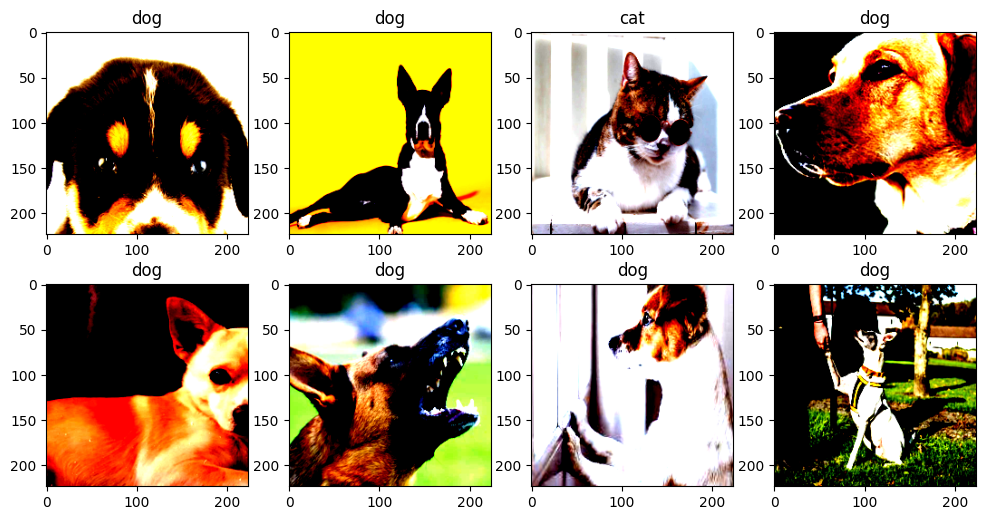

In [7]:
name = {1:'dog', 0:'cat'}
images, labels = next(iter(train_dataloader))
fig, ax = plt.subplots(2, 4, figsize = (12, 6))
for idx, axes in enumerate(ax.flat):
    img = images[idx, :, :, :]
    img = np.transpose(img, (1, 2, 0))
    axes.imshow(img.numpy())
    axes.set_title(name[labels[idx].item()]);

In [8]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [9]:
# Creating the network - FCNN
# class Network(nn.Module): 
#     def __init__(self):
#         super().__init__()
#         self.flatten = nn.Flatten()
#         self.conv_layer = nn.Sequential(
#             nn.Conv2d(3, 16, 3, padding = 1), # 16 * 224 * 224
#             nn.ReLU(),
#             nn.MaxPool2d(2, 2), # 16 * 112 * 112
#             nn.Conv2d(16, 32, 3, padding = 1), # 32 * 112 * 112
#             nn.ReLU(),
#             nn.MaxPool2d(2, 2), # 32 * 56 * 56
#             nn.Conv2d(32, 64, 3, padding = 1), # 64 * 56 * 56
#             nn.ReLU(),
#             nn.MaxPool2d(2, 2) # 64 * 28 * 28
#         )
#         self.linear_relu_stack = nn.Sequential(
#             nn.Linear(64 * 28 * 28, 512), 
#             nn.ReLU(),
#             nn.Dropout(0.2),
#             nn.Linear(512, 512),
#             nn.ReLU(),
#             nn.Dropout(0.2),
#             nn.Linear(512, 32),
#             nn.ReLU(),
#             nn.Dropout(0.2),
#             nn.Linear(32, 2)
#         )

#     def forward(self, x):
#         x = self.conv_layer(x)
#         x = self.flatten(x)
#         logits = self.linear_relu_stack(x)
#         return logits

In [10]:
# model = Network() # creating an instance of the Network class

In [11]:
# take the model to GPU
# model = model.to(device)

In [12]:
# training the model
# import tqdm
# train_loss_epoch = []
# test_loss_epoch = []

# for epoc in tqdm.tqdm(range(hyperparameter['epoch'])):
#     print(f"starting epoch: {epoc}")
#     train_loss = 0
#     model.train() # this will use dropout layer
#     for image, label in train_dataloader:
#         # taking the data to device
#         image = image.to(device)
#         label = label.to(device)
#         # Zero the gradients
#         optimizer.zero_grad()
#         #forward pass
#         logits = model(image)
#         #loss
#         loss = criterion(logits, label)
#         #backprop
#         loss.backward()
#         #applying the gradient descent
#         optimizer.step()
#         train_loss += loss.item()

#     validation_loss = 0
#     model.eval() # this will turn off all the dropput layer
#     with torch.no_grad():
#         correct_pred = 0
#         for image, label in test_dataloader:
#             image = image.to(device)
#             label = label.to(device)
#             logits = model(image)
#             loss = criterion(logits, label)
#             validation_loss += loss.item()
#             _, idx = logits.max(dim = 1)
#             correct_pred += (idx == label).sum().item()
    
#     print('training loss:', train_loss)
#     print('validation loss:', validation_loss)
#     print(f"accuracy score for validation data {correct_pred/((len(test_dataset)// hyperparameter['batch_size']))*hyperparameter['batch_size']}")
#     train_loss_epoch.append(train_loss/((len(train_dataset)// hyperparameter['batch_size']))*hyperparameter['batch_size'])

In [13]:
# import matplotlib.pyplot as plt
# plt.plot(list(range(hyperparameter['epoch'])), train_loss_epoch)

In [14]:
import torchvision
model = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
            nn.Linear(num_ftrs, 32), 
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 2))
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [15]:
criterion = nn.CrossEntropyLoss() # cross entropy loss, this takes care of softmax probabilities
optimizer = torch.optim.Adam(model.parameters(), lr=hyperparameter['lr']) # gradient descent
criterion = criterion.to(device)

In [16]:
import tqdm
from sklearn.metrics import accuracy_score

train_loss_epoch = []
test_loss_epoch = []

for epoch in tqdm.tqdm(range(hyperparameter['epoch'])):
    print(f"Starting epoch: {epoch}")
    train_loss = 0
    model.train()

    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        logits = model(images)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    validation_loss = 0
    model.eval()

    correct_pred = 0
    total_samples = 0

    with torch.no_grad():
        for images, labels in test_dataloader:
            images, labels = images.to(device), labels.to(device)
            logits = model(images)
            loss = criterion(logits, labels)
            validation_loss += loss.item()
            _, predicted = logits.max(dim=1)
            correct_pred += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    train_loss_epoch.append(train_loss / len(train_dataloader.dataset))
    test_loss_epoch.append(validation_loss / len(test_dataloader.dataset))

    accuracy = correct_pred / total_samples
    print('Training Loss:', train_loss)
    print('Validation Loss:', validation_loss)
    print(f'Accuracy Score for Validation Data: {accuracy:.4f}')

  0%|                                                                                           | 0/30 [00:00<?, ?it/s]

Starting epoch: 0


  3%|██▊                                                                                | 1/30 [00:10<05:16, 10.91s/it]

Training Loss: 24.61937940120697
Validation Loss: 2.5436626225709915
Accuracy Score for Validation Data: 0.8516
Starting epoch: 1


  7%|█████▌                                                                             | 2/30 [00:22<05:09, 11.07s/it]

Training Loss: 9.39194530248642
Validation Loss: 1.6686745882034302
Accuracy Score for Validation Data: 0.9141
Starting epoch: 2


 10%|████████▎                                                                          | 3/30 [00:33<05:03, 11.24s/it]

Training Loss: 12.510907586663961
Validation Loss: 2.8731169551610947
Accuracy Score for Validation Data: 0.8516
Starting epoch: 3


 13%|███████████                                                                        | 4/30 [00:44<04:54, 11.31s/it]

Training Loss: 10.077893666923046
Validation Loss: 1.5920140519738197
Accuracy Score for Validation Data: 0.8828
Starting epoch: 4


 17%|█████████████▊                                                                     | 5/30 [00:56<04:42, 11.30s/it]

Training Loss: 9.632845681160688
Validation Loss: 1.694648653268814
Accuracy Score for Validation Data: 0.9141
Starting epoch: 5


 20%|████████████████▌                                                                  | 6/30 [01:07<04:32, 11.36s/it]

Training Loss: 7.528692981228232
Validation Loss: 1.9615634083747864
Accuracy Score for Validation Data: 0.9062
Starting epoch: 6


 20%|████████████████▌                                                                  | 6/30 [01:18<05:13, 13.04s/it]

KeyboardInterrupt

